### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [3]:
df=pd.read_csv('Student_Performance.csv')

In [4]:
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

In [6]:
df.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [7]:
df.shape

(25000, 16)

In [8]:
df.columns

Index(['student_id', 'age', 'gender', 'school_type', 'parent_education',
       'study_hours', 'attendance_percentage', 'internet_access',
       'travel_time', 'extra_activities', 'study_method', 'math_score',
       'science_score', 'english_score', 'overall_score', 'final_grade'],
      dtype='object')

In [9]:
df.isnull().sum()

student_id               0
age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
travel_time              0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
dtype: int64

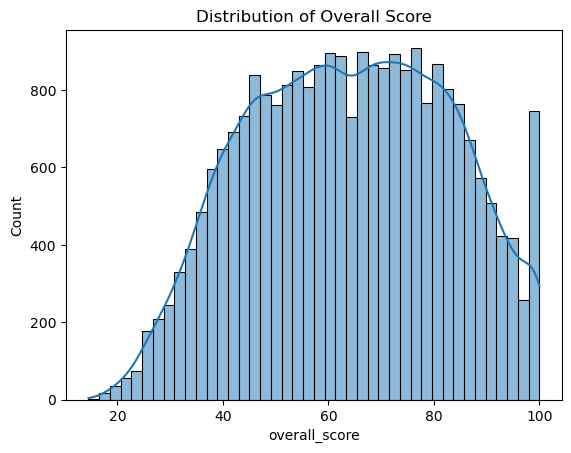

In [10]:
sns.histplot(df['overall_score'], kde=True)
plt.title('Distribution of Overall Score')
plt.show()

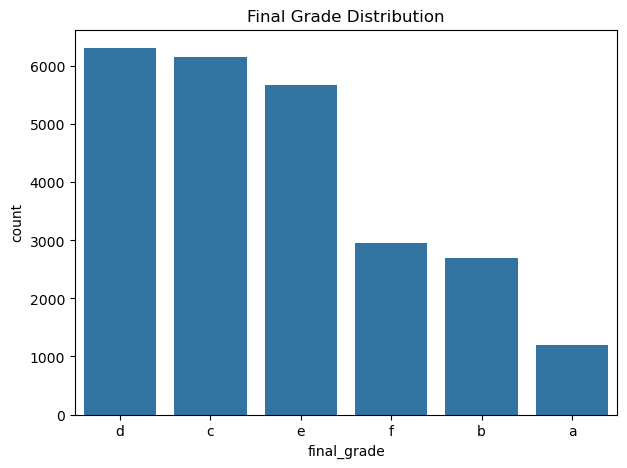

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x='final_grade',
    order=df['final_grade'].value_counts().index
)
plt.title('Final Grade Distribution')
plt.show()

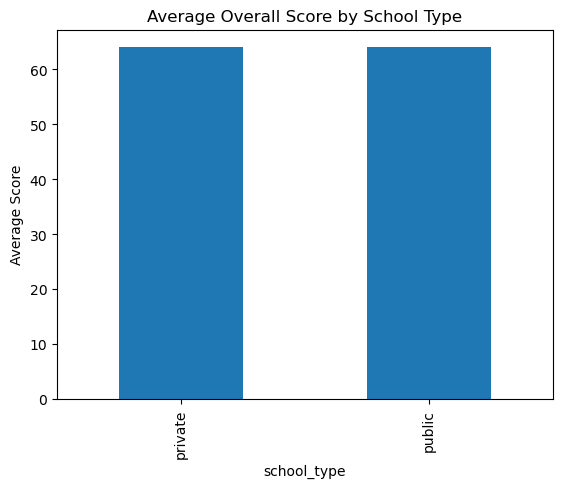

In [12]:
df.groupby('school_type')['overall_score'].mean().plot(kind='bar')
plt.title('Average Overall Score by School Type')
plt.ylabel('Average Score')
plt.show()

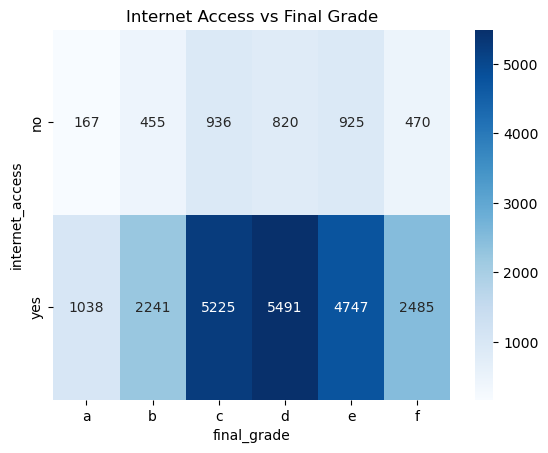

In [13]:
ct = pd.crosstab(df['internet_access'], df['final_grade'])
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Internet Access vs Final Grade')
plt.show()

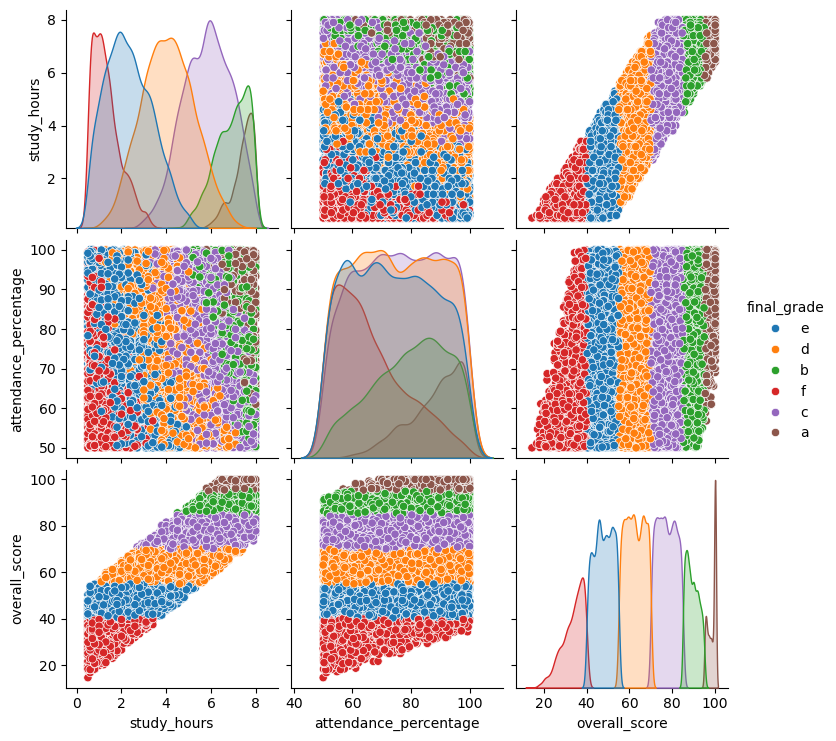

In [14]:
sns.pairplot(df[['study_hours', 'attendance_percentage', 'overall_score', 'final_grade']],
             hue='final_grade')
plt.show()

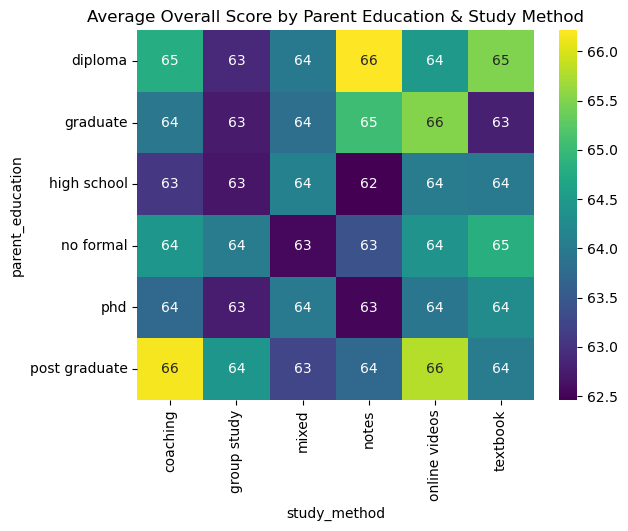

In [15]:
pivot = df.groupby(['parent_education', 'study_method'])['overall_score'].mean().unstack()
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title('Average Overall Score by Parent Education & Study Method')
plt.show()

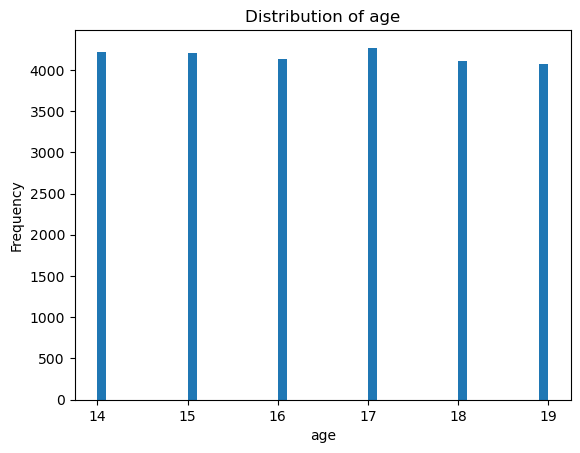

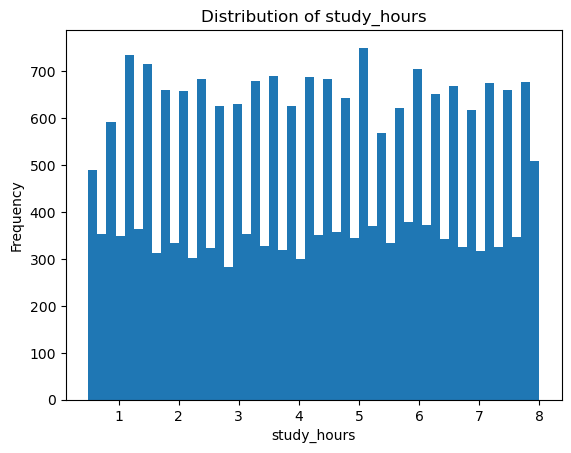

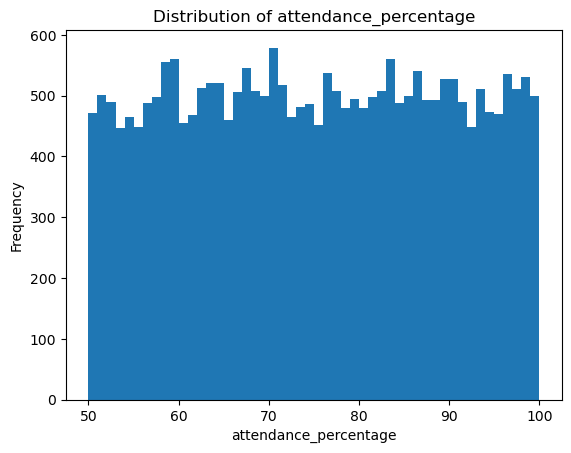

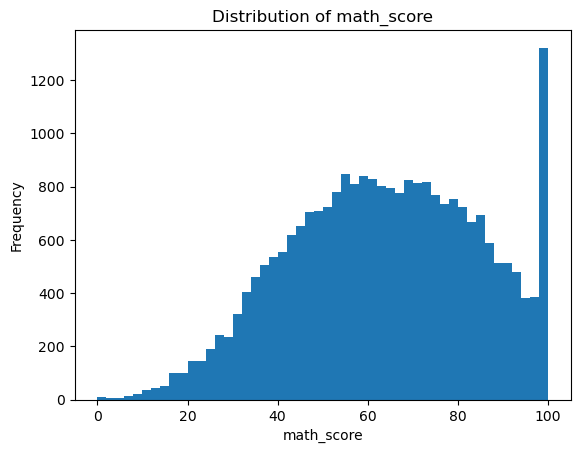

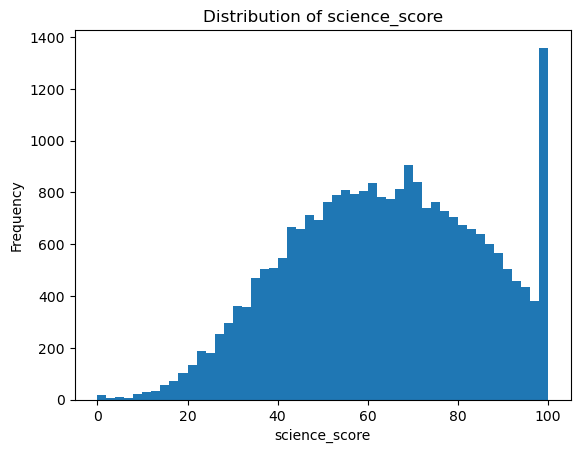

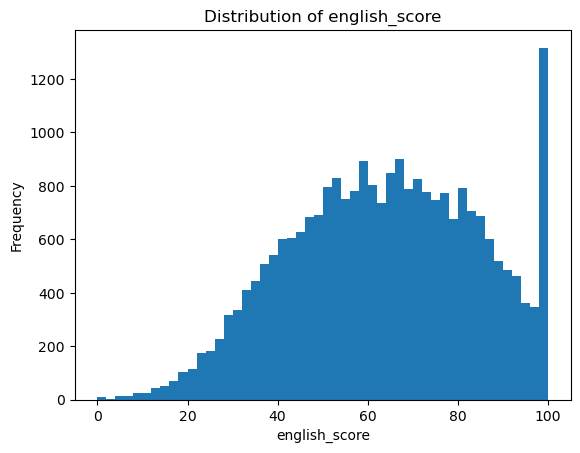

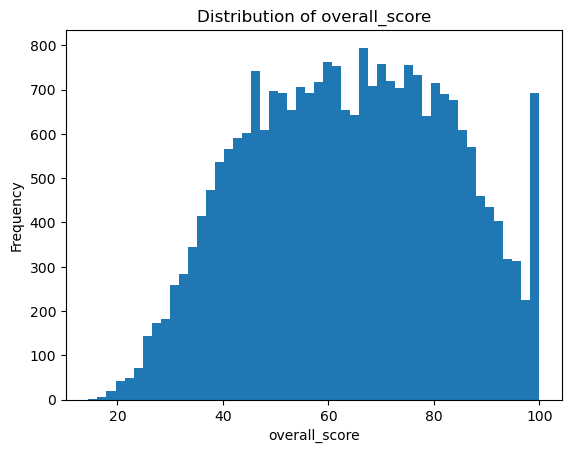

In [16]:
num_cols = [
    'age', 'study_hours', 'attendance_percentage',
    'math_score', 'science_score', 'english_score', 'overall_score'
]

for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

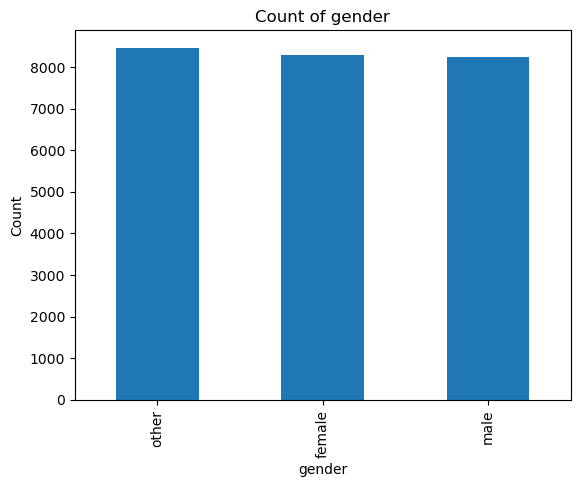

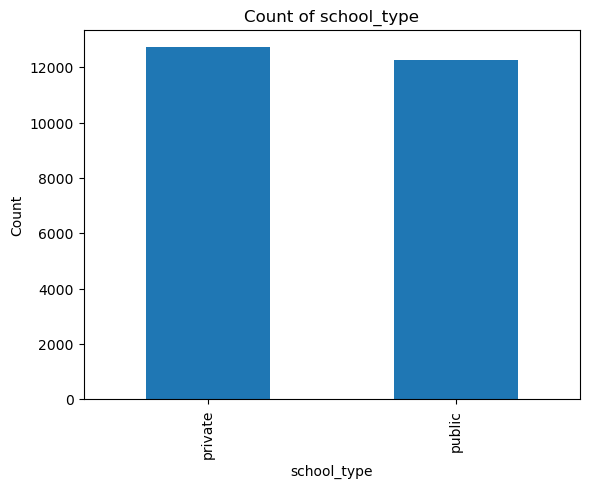

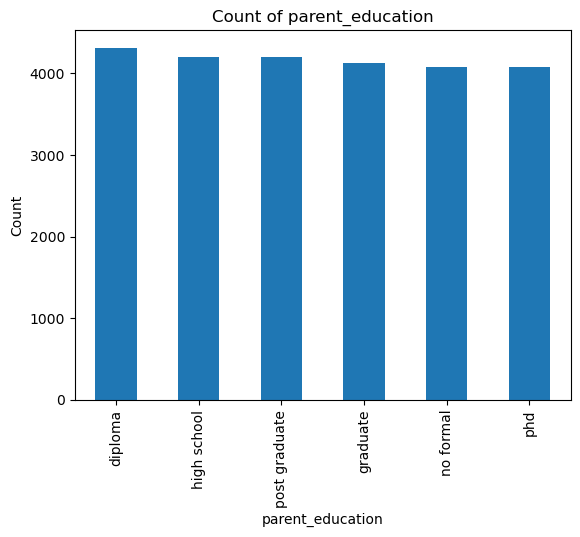

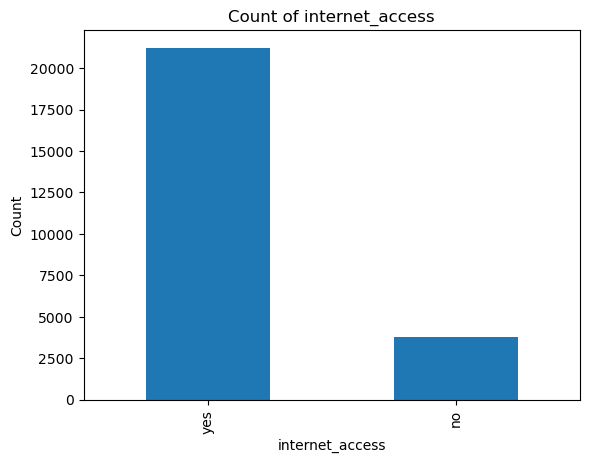

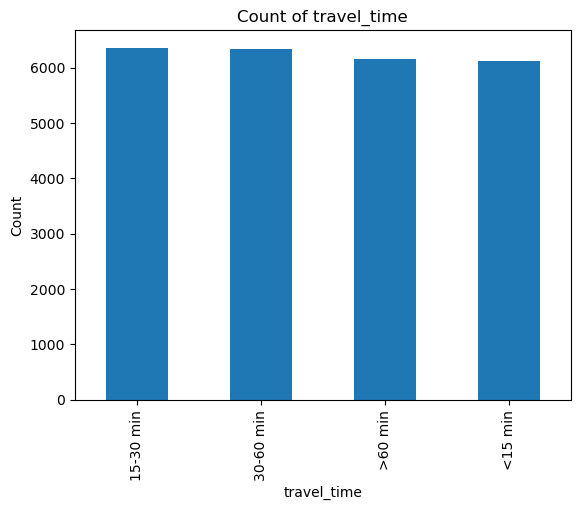

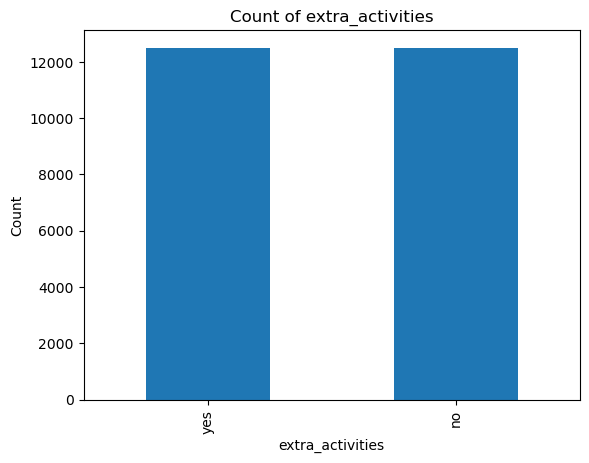

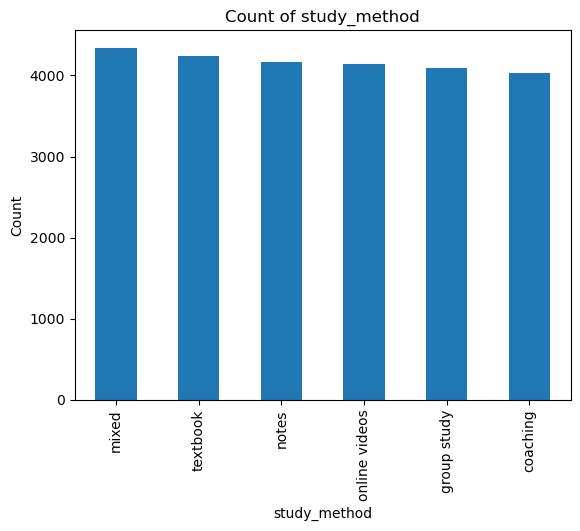

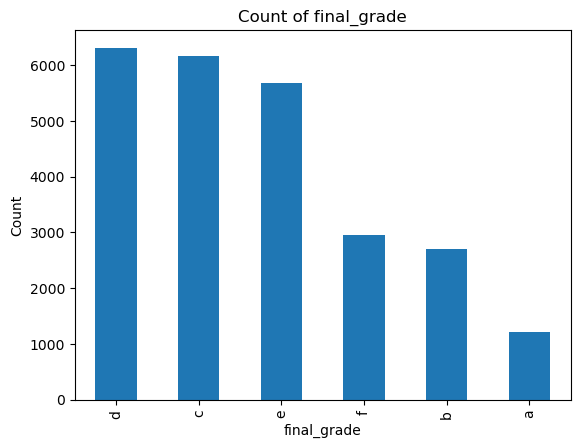

In [17]:
cat_cols = [
    'gender', 'school_type', 'parent_education',
    'internet_access', 'travel_time',
    'extra_activities', 'study_method', 'final_grade'
]

for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

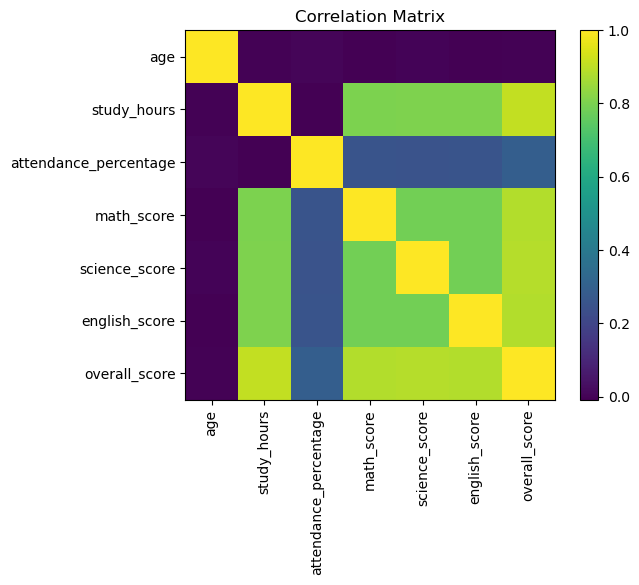

In [18]:
corr = df[num_cols].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Correlation Matrix')
plt.show()

### Data Preprocessing


In [19]:
df = df.drop_duplicates()

In [20]:
#Remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound,df[column])

In [21]:
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [22]:
df['gender'].unique()

array(['male', 'female', 'other'], dtype=object)

In [23]:
df['school_type'].unique()

array(['public', 'private'], dtype=object)

In [24]:
df['parent_education'].unique()

array(['post graduate', 'graduate', 'high school', 'no formal', 'diploma',
       'phd'], dtype=object)

In [25]:
df['internet_access'].unique()

array(['yes', 'no'], dtype=object)

In [26]:
df['extra_activities'].unique()

array(['yes', 'no'], dtype=object)

In [27]:
df['study_method'].unique()

array(['notes', 'textbook', 'group study', 'coaching', 'mixed',
       'online videos'], dtype=object)

In [28]:
df['final_grade'].unique()

array(['e', 'd', 'b', 'f', 'c', 'a'], dtype=object)

In [29]:
df['gender']=df['gender'].map({'male':0,'female':1,'other':2})
df['school_type']=df['school_type'].map({'public':0,'private':1})

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['parent_education']=encoder.fit_transform(df['parent_education'])
df['internet_access']=encoder.fit_transform(df['internet_access'])
df['extra_activities']=encoder.fit_transform(df['extra_activities'])
df['study_method']=encoder.fit_transform(df['study_method'])
df['final_grade']=encoder.fit_transform(df['final_grade'])


In [31]:
travel_mapping = {
    "<15 min": 0,
    "15-30 min": 1,
    "30-60 min": 2,
    ">60 min": 3
}

df["travel_time"] = df["travel_time"].map(travel_mapping)


In [32]:
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,0,0,5,3.1,84.3,1,0,1,3,42.7,55.4,57.0,53.1,4
1,2,18,1,0,1,3.7,87.8,1,3,0,5,57.6,68.8,64.8,61.3,3
2,3,17,1,1,5,7.9,65.5,0,0,0,3,84.8,95.0,79.2,89.6,1
3,4,16,2,0,2,1.1,58.1,0,1,0,3,44.4,27.5,54.7,41.6,4
4,5,16,1,0,2,1.3,61.0,1,2,1,1,8.9,32.7,30.0,25.4,5


In [33]:
X = df.iloc[:, :15]
y = df["final_grade"]


In [34]:
X.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score
0,1,14,0,0,5,3.1,84.3,1,0,1,3,42.7,55.4,57.0,53.1
1,2,18,1,0,1,3.7,87.8,1,3,0,5,57.6,68.8,64.8,61.3
2,3,17,1,1,5,7.9,65.5,0,0,0,3,84.8,95.0,79.2,89.6
3,4,16,2,0,2,1.1,58.1,0,1,0,3,44.4,27.5,54.7,41.6
4,5,16,1,0,2,1.3,61.0,1,2,1,1,8.9,32.7,30.0,25.4


In [35]:
y

0        4
1        3
2        1
3        4
4        5
        ..
14995    5
14996    2
14997    3
14998    5
14999    5
Name: final_grade, Length: 15000, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 15)
(3000, 15)
(12000,)
(3000,)


In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [39]:
X_train

array([[ 0.53734902, -0.27740756, -1.23261488, ..., -0.28862433,
        -0.51542826, -1.04985025],
       [ 0.5006155 , -1.44872731,  1.21770874, ...,  1.08610685,
         1.74637584,  1.89992338],
       [-0.09705502, -0.27740756,  1.21770874, ..., -1.14305795,
        -1.08328546, -2.06482613],
       ...,
       [-0.49049642, -0.86306744, -0.00745307, ..., -1.48196737,
        -1.68964146, -1.27187623],
       [-1.53705515,  1.47957207,  1.21770874, ..., -0.87574911,
        -0.5876135 , -0.53707598],
       [-0.05616299, -0.86306744, -1.23261488, ..., -1.8208768 ,
        -1.96394536, -2.05425346]])

In [40]:
X_test

array([[ 0.92085619,  1.47957207, -1.23261488, ...,  0.14575253,
        -0.25556141,  0.21886959],
       [-0.23983058, -0.86306744, -0.00745307, ..., -1.59652831,
        -1.7137032 , -1.50447486],
       [ 1.3062116 , -0.86306744, -0.00745307, ..., -0.89006923,
        -0.39993188, -1.07628192],
       ...,
       [ 0.57985825,  0.30825231, -1.23261488, ..., -0.24566398,
        -0.99185083, -0.79081995],
       [ 1.50882352,  0.89391219, -0.00745307, ...,  1.38682929,
         1.14001985,  1.70432908],
       [ 1.25954385,  1.47957207,  1.21770874, ..., -0.74209469,
        -1.12178426, -1.02870492]])

### Model Training

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred))


Baseline Accuracy: 0.9953333333333333


### Hyperparameter tuning with Gridsearchcv

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=1)

### Evaluation

In [43]:
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score: 0.9971666666666665


In [44]:
best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Tuned Test Accuracy:", accuracy_score(y_test, y_pred_best))


Tuned Test Accuracy: 0.9953333333333333


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       155
           1       0.98      0.99      0.99       314
           2       0.99      0.99      0.99       752
           3       1.00      1.00      1.00       721
           4       1.00      1.00      1.00       670
           5       1.00      1.00      1.00       388

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000



### Save the model

In [47]:
import joblib

joblib.dump(best_model, "student_performance_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [48]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']